# Metodos Numericos - Laboratorio 4
Grupo 9

Presentado por:

**Juan Diego Rozo Álvarez - Universidad Nacional de Colombia**

**Juan Pablo Gómez Cristancho - Universidad Nacional de Colombia**

---
En este laboratorio se hará uso de métodos numericos para ajustar curvas, tal como el metodo de **Regresión Lineal por Mínimos Cuadrados** y **Combinaciones Lineales para Mínimos Cuadrados**.

La implementación de estos metodos será realizada en su totalidad haciendo el uso en Python.

A continuación se explica la estructura del documento en Collab.

* Definicion de librerias.
* Definicion de getTabla para imprimir los datos almacenados.
* Definicion del método de Regresión Lineal por Mínimos Cuadrados y derivados.
* Implementacion del método regresion_main(args) y sus derivados.
* Definicion del método de Combinaciones Lineales para Mínimos Cuadrados con   derivados.
* Implementacion del metodo combinaciones_main(args) y derivados.

In [ ]:
import time
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definición de getTabla
---


`getTabla(args)` es una función de autoria propia del grupo, la cual ayuda a almacenar los datos recopilados de un metodo en formato de un diccionario en Python. La razon por la cual se realiza esta implementacion se debe a dos factores:


1.   **Legibilidad:** Al usar un diccionario, se puede puede representar cada columna de información como una llave con un nombre intuitivo la cual tiene relacionado un valor del tipo Lista, en lugar de usar una lista de listas, lo cual hace que el codigo sea ilegible el código.
2.   **Complejidad algorítmica:** Al ser un diccionario, la búsqueda de una llave es siempre **O(1)**, dada la naturaleza de la estructura Hash.

A continuación, se muestrá el codigo de `getTabla(args)`

In [ ]:
def getTabla(heads_data,setTitle="",character=" "):
    '''

    Genera una tabla en formato de texto a partir de un diccionario de listas.

    Args:
        heads_data (dict): Llaves como encabezados y listas como columnas de datos.
        setTitle (str): Titulo de la tabla (opcional).
        character (str): Caracter de relleno para alinear texto (opcional).

    Returns:
        str: Representacion en string de la tabla formateada.

    Variables:
        table (str): Acumulador de texto para construir la tabla final.
        long_elements_x (dict): Guarda el ancho maximo necesario para cada columna.
        first_head (str): Primera llave del diccionario, usada para conocer el numero de filas.
        long_tabla_y (int): Altura de la tabla (numero de filas).
        long_tabla_x (int): Ancho total de la tabla (sumatoria de anchos de columnas).
        enmarcate (int): Ancho total de la tabla con bordes, usado para formatear y centrar.


    Nota:
        Todas las listas deben tener la misma longitud para evitar errores.


    '''
    table=""
    long_elements_x=dict()
    first_head=next(iter(heads_data))
    long_tabla_y=len(heads_data[first_head])

    if (long_tabla_y==0):
        return "Tabla sin datos"

    if len(character)>1: #si character son varios digitos, agarra el primero
        character=character[:1]

    for head in heads_data:
        # Este for consigue los mayores anchos necesarios para cada columna de la tabla, para mantener un formato
        long_element_x=max(map(str,heads_data[head]),key=len)
        long_head=len(head)
        long_data=len(long_element_x)
        long_elements_x[head]=max(long_head,long_data)

    long_tabla_x=sum(long_elements_x.values())
    enmarcate=long_tabla_x+2*len(heads_data)+len(heads_data)+1
    title=setTitle.center(enmarcate)

    table +="\n"+title+"\n"+"="*enmarcate+"\n"+"|"

    for head in heads_data:
        # Este for carga los encabezados del diccionario a la tabla
        tabulate=long_elements_x[head]
        text_head=str(head).center(tabulate,character)
        table+=" "+text_head+" |"

    table+="\n"+"="*enmarcate+"\n"

    for i in range(long_tabla_y):
        # Este for carga los datos obtenidos a la tabla
        table+="|"
        for head in heads_data:
            tabulate=long_elements_x[head]
            text_data=str(heads_data[head][i]).center(tabulate,character)
            table+=" "+text_data+" |"
        table+="\n"

    table+="="*enmarcate
    return table

# Definición del método de Regresión Lineal por Mínimos Cuadrados
---
blablabla

In [ ]:
class SistemaLineal:
    """
    Clase para resolver sistemas lineales Ax = B mediante factorización LU sin pivoteo.
    """
    def __init__(self,A:np.ndarray,B:np.ndarray):
        """
        Inicializa el sistema con matrices A (coeficientes) y B (independientes).

        Args:
            A (np.ndarray): Matriz cuadrada de coeficientes.
            B (np.ndarray): Vector columna de términos independientes.
        """
        if not isinstance(A,np.ndarray) or not isinstance(B,np.ndarray):
            raise TypeError("A y B deben ser objetos np.ndarray")
        if A.shape[0]!=A.shape[1]:
            raise ValueError("La matriz A debe ser cuadrada")
        if A.shape[0]!=B.shape[0]:
            raise ValueError("Dimensión de B incompatible con A")
        if np.isclose(np.linalg.det(A),0):
            raise ValueError("La matriz A no tiene solución única")
        self.A=A.astype(float)
        self.B=B.astype(float)
        self.L=None
        self.U=None

    def _es_triangular_superior(self,M):
        """Verifica si una matriz es triangular superior."""
        return np.allclose(M,np.triu(M))

    def _es_triangular_inferior(self,M):
        """Verifica si una matriz es triangular inferior."""
        return np.allclose(M,np.tril(M))

    def _sustitucion_regresiva(self,U,y):
        """Realiza sustitución regresiva sobre un sistema UX = y."""
        n=U.shape[0]
        x=[0.0]*n
        x[-1]=y[-1]/U[-1,-1]
        for i in range(n-2,-1,-1):
            x[i]=(y[i]-np.dot(U[i,i+1:],x[i+1:]))/U[i,i]
        return x

    def _sustitucion_progresiva(self,L,b):
        """Realiza sustitución progresiva sobre un sistema LY = b."""
        n=L.shape[0]
        y=[0.0]*n
        y[0]=b[0]/L[0,0]
        for i in range(1,n):
            y[i]=(b[i]-np.dot(L[i,:i],y[:i]))/L[i,i]
        return y

    def factorizar(self):
        """
        Factoriza la matriz A en L y U sin pivoteo. Guarda L y U en atributos internos.
        """
        A=self.A.copy()
        n=A.shape[0]
        L=np.eye(n)
        U=A.copy()
        for j in range(n):
            if np.isclose(U[j,j],0):
                raise ValueError(f"Pivote cero en fila {j}, se requiere pivoteo.")
            for i in range(j+1,n):
                m_ij=U[i,j]/U[j,j]
                U[i]=U[i]-m_ij*U[j]
                L[i,j]=m_ij
        self.L=L
        self.U=U

    def resolver(self):
        """
        Resuelve el sistema lineal Ax = B usando factorización LU.

        Returns:
            np.ndarray: Vector solución del sistema.
        """
        if self.L is None or self.U is None:
            self.factorizar()
        y=self._sustitucion_progresiva(self.L,self.B)
        x=self._sustitucion_regresiva(self.U,y)
        return np.array(x)




class LinealRegresion(SistemaLineal):
    """
    Clase que ajusta una regresión lineal a un conjunto de puntos (x, y).
    """
    def __init__(self,x_values,y_values):
        """
        Inicializa la clase con puntos (x, y) y calcula valores auxiliares.

        Args:
            x_values (list): Lista de valores x.
            y_values (list): Lista de valores y.
        """

        self.x_points=x_values
        self.y_points=y_values

        self.x_points_pow2=np.square(x_values)
        self.xy_points=[x*y for x,y in zip(self.x_points,self.y_points)]

        self.line=None

        pass

    def get_function(self):
        """
        Calcula la función de regresión lineal y la guarda como expresión simbólica.

        Returns:
            Expr: Expresión simbólica de la recta ajustada.
        """

        n_dimension=len(self.x_points) # cantidad de elementos

        matrix=np.array([[sum(self.x_points_pow2), sum(self.x_points)],
                         [sum(self.x_points),n_dimension]])

        vector=np.array([sum(self.xy_points),
                         sum(self.y_points)])

        # se instancia un objeto matriz para resolver el sistema de Gauss
        matriz_object=SistemaLineal(matrix,vector)

        a,b=matriz_object.resolver()
        x=sp.symbols("x")
        self.line=a*x+b
        return self.line


    def get_table_values(self):
        """
        Devuelve los valores intermedios de la regresión como diccionario.

        Returns:
            dict: Diccionario con valores x, y, x², x*y y sus sumatorias.
        """
        results = {
            "x_k": list(self.x_points),
            "y_k": list(self.y_points),
            "x^2_k": list(self.x_points_pow2),
            "x_k*y_k": list(self.xy_points)
        }

        for key in results:
            results[key].append("-")

        # se añaden las sumas al final de cada columna
        results["x_k"].append(sum(self.x_points))
        results["y_k"].append(sum(self.y_points))
        results["x^2_k"].append(sum(self.x_points_pow2))
        results["x_k*y_k"].append(sum(self.xy_points))

        return results


    def graphic_regresion(self):
        """
        Grafica los puntos y la recta de regresión lineal calculada.
        """
        plt.figure(figsize=(12, 8))
        plt.scatter(self.x_points, self.y_points, label="Puntos (x,y)")

        x=np.linspace(min(self.x_points),max(self.x_points),100)
        y=sp.lambdify(sp.symbols("x"),self.line, modules=["numpy"])
        plt.plot(x,y(x), label="Recta", color="red")

        plt.xlim(min(self.x_points),max(self.x_points))
        plt.ylim(min(self.y_points),max(self.y_points))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"Regresión Lineal para {self.line}")
        plt.legend()
        plt.grid(True)

        plt.axhline(color="black", linewidth=1)
        plt.axvline(color="black", linewidth=1)


        # Mostrar gráfico
        plt.show()

        pass


# Definición del main para Regresión Lineal por Mínimos Cuadrados
---
blablabla

In [ ]:
def user_input():

    x_values=[]
    y_values=[]

    msg1="Calculadora de regresiones lineales de la forma AX + B\n"
    msg2="Ingrese los puntos para x:\n"
    ejemplo1="Ejemplo: \nX_k = 1 2 3 4 5\n"

    print(msg1)
    print(msg2)
    print(ejemplo1)
    while True:
        try:
            x_input=list(map(float, input(">> X_k = ").strip().split()))
            break
        except ValueError:
            print("ERROR: Los puntos son inválidos, intente nuevamente.\n")

    while True:
        print(f"\nIngrese {len(x_input)} para Y en total")
        try:
            y_input=list(map(float, input(">> Y_k = ").strip().split()))
            if len(y_input)!=len(x_input):
                raise ValueError("ERROR: La cantidad de puntos de Y es diferente de la de X")
            break
        except ValueError:
            print("ERROR: Los puntos son inválidos, intente nuevamente.\n")

    return x_input, y_input




def regresion_main(x_input=None, y_input=None, user_console=True):

    if user_console==True:
        x_input, y_input=user_input()

    recta=LinealRegresion(x_input,y_input)

    init=time.perf_counter()
    function=recta.get_function()
    end=time.perf_counter()
    print(f"Tiempo de ejecución: {end-init}")


    results=recta.get_table_values()
    print(getTabla(results, setTitle=f"f(x) = {function}", character=" "))
    recta.graphic_regresion()

    pass

Se ejecuta el main

Calculadora de regresiones lineales de la forma AX + B

Ingrese los puntos para x:

Ejemplo: 
X_k = 1 2 3 4 5

>> X_k = -1 0 1 2 3 4 5 6

Ingrese 8 para Y en total
>> Y_k = 10 9 7 5 4 3 0 -1
Tiempo de ejecución: 0.0005933520000098724

f(x) = 8.64285714285714 - 1.60714285714286*x
| x_k  | y_k  | x^2_k | x_k*y_k |
| -1.0 | 10.0 |  1.0  |  -10.0  |
| 0.0  | 9.0  |  0.0  |   0.0   |
| 1.0  | 7.0  |  1.0  |   7.0   |
| 2.0  | 5.0  |  4.0  |   10.0  |
| 3.0  | 4.0  |  9.0  |   12.0  |
| 4.0  | 3.0  |  16.0 |   12.0  |
| 5.0  | 0.0  |  25.0 |   0.0   |
| 6.0  | -1.0 |  36.0 |   -6.0  |
|  -   |  -   |   -   |    -    |
| 20.0 | 37.0 |  92.0 |   25.0  |


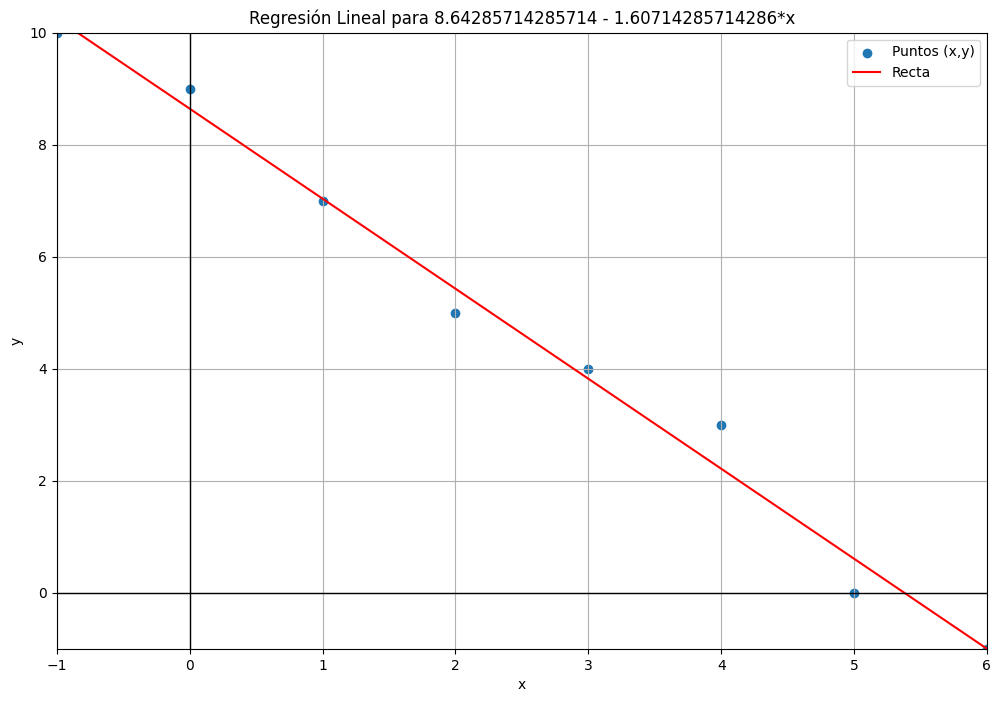

In [ ]:
regresion_main(user_console=True)

Tiempo de ejecución: 0.0012854650000235779

f(x) = 2.22619047619048*x - 0.69047619047619
| x_k | y_k | x^2_k | x_k*y_k |
|  -1 | -10 |   1   |    10   |
|  0  |  3  |   0   |    0    |
|  1  |  7  |   1   |    7    |
|  2  |  5  |   4   |    10   |
|  3  |  4  |   9   |    12   |
|  4  |  9  |   16  |    36   |
|  5  |  10 |   25  |    50   |
|  6  |  11 |   36  |    66   |
|  -  |  -  |   -   |    -    |
|  20 |  39 |   92  |   191   |


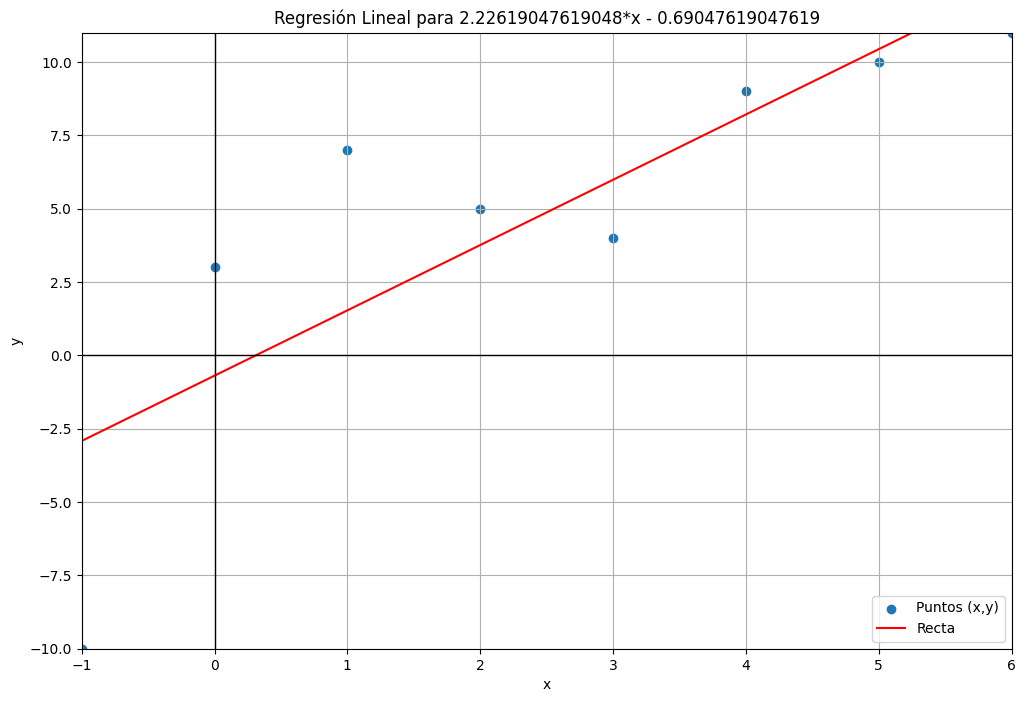

In [ ]:
x=[-1,0,1,2,3,4,5,6]
y=[-10,3,7,5,4,9,10,11]
regresion_main(x,y,False)